# Засоби підготовки та налізу даних
## Лабораторна робота №4_2
## ФБ-22 Лаптєв Денис

### Підготовка середовища

In [1]:
import pandas as pd
import numpy as np
import urllib.request
import scipy
import sklearn.preprocessing
import timeit

from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline
%matplotlib widget
print ('setup complete')

setup complete


#### Завантаження датасету

In [2]:
def load_data(id = 2): #45; 2; 235
    url = "https://archive.ics.uci.edu/static/public/"+str(id)+"/data.csv"
    filename = "data/data_2.csv"

    urllib.request.urlretrieve(url, filename)



def create_df():
    df = pd.read_csv("data/data_2.csv")
    return df

def create_array():
    array = np.genfromtxt('data/data_2.csv',dtype=str, delimiter=',', skip_header=1)
    return array

#load_data()
df = create_df()
array = create_array()

In [3]:
df.info()
# df.workclass.nunique()
# df.workclass.unique()
# print(df)
# df.to_csv('output.csv', index=False)

array.shape
# np.set_printoptions(threshold=np.inf); 
# print(array)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


(48842, 15)

### Хід роботи
Виконати всі завдання, використовуючи як numpy array, так і
dataframe
1. Поборотися із зниклими даними.
2. Пронормувати вибраний датасет або стандартизувати його (нормалізація і стандартизація мають бути реалізовані як окремі функції без застосування додаткових бібліотек, як наприклад sklearn.preprocessing).
3. Збудувати гістограму по одному із атрибутів, що буде показувати на кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.
4. Збудувати графік залежності одного integer/real атрибута від іншого.
5. Підрахувати коефіцієнт Пірсона та Спірмена для двох integer/real атрибутів.
6. Провести One Hot Encoding категоріального string атрибуту.
7. Провести візуалізацію багатовимірних даних, використовуючи приклади, наведені у медіумі - https://towardsdatascience.com/the-art-of-effective-visualization-of-multi-dimensional-data-6c7202990c57.

In [4]:
#1
def fight_NaN_pd(df):# for pandas dataframe
    col_with_miss = ['native-country', 'workclass', 'occupation']
    for i in col_with_miss:
        df[i] = df[i].replace(['?', np.nan], df[i].value_counts().idxmax())
    return df

def fight_NaN_np(npdf):# for numpy array
    for i in (1, 6, 13):
        values, counts = np.unique(npdf[:, i], return_counts=True)
        most_frequent_value = values[np.argmax(counts)]
        npdf[:, i] = np.where(npdf[:, i] == '?', most_frequent_value, npdf[:, i])
        npdf[:, i] = np.where(npdf[:, i] == 'NaN', most_frequent_value, npdf[:, i])
    return npdf

def DropAndForget_pd(df):# for pandas dataframe
    col_with_miss = ['native-country', 'workclass', 'occupation']
    for i in col_with_miss:
        df = df.drop(df.loc[df[i] =='?'].index)

    return df

def DropAndForget_np(npdf):# for numpy array
    mask = np.ones(len(npdf), dtype=bool)
    for index, row in enumerate(npdf):
        for i in (1, 6, 13):
            if (row[i] == '?') or (row[i] == 'NaN'):
                mask[index] = False
    npdf = npdf[mask]
    return npdf



df = fight_NaN_pd(df)
array = fight_NaN_np(array)
#df = DropAndForget_pd(df)
#array = DropAndForget_np(array)

SeTuP = '''
from __main__ import fight_NaN_pd, create_df, create_array, fight_NaN_np
df = create_df()
array = create_array()'''
_pd= '''
df = fight_NaN_pd(df)'''
print("pd:", timeit.repeat(setup=SeTuP, stmt=_pd, repeat=1, number=1))
_np = '''
array = fight_NaN_np(array)'''
print("np:", timeit.repeat(setup=SeTuP, stmt=_np, repeat=1, number=1))


pd: [0.01577309999265708]
np: [0.0757533999858424]


In [5]:
#2
def norm_pd(df):
    result_df = df[["capital-gain", "capital-loss", "fnlwgt"]]
    result_df = (result_df-result_df.min())/(result_df.max()-result_df.min())
    return result_df

def standard_pd(df):
    result_df = df[["capital-gain", "capital-loss", "fnlwgt"]]
    result_df = (result_df - result_df.mean()) / result_df.std()
    return result_df

def norm_np(array): # return only part with numbers
    result_np = array[:, [2, 10, 11]].astype(float)
    result_np = (result_np - result_np.min(axis=0)) / (result_np.max(axis=0) - result_np.min(axis=0))
    return result_np

def standard_np(array): # return only part with numbers
    result_np = array[:, [2,  10, 11]].astype(float)
    result_np = (result_np - result_np.mean(axis=0)) / result_np.std(axis=0)
    return result_np

SeTuP = '''
from __main__ import fight_NaN_pd, create_df, create_array, fight_NaN_np, norm_pd, norm_np, standard_pd, standard_np
df = fight_NaN_pd(create_df())
array = fight_NaN_np(create_array())'''
_pd= '''
temp_df = standard_pd(df)
norm_df = norm_pd(df)'''
print("pd:", timeit.repeat(setup=SeTuP, stmt=_pd, repeat=1, number=1))
_np = '''
temp_arr = standard_np(array)
norm_array = norm_np(array)'''
print("np:", timeit.repeat(setup=SeTuP, stmt=_np, repeat=1, number=1))

norm_df = norm_pd(df)
norm_array = norm_np(array)

pd: [0.006229600025108084]
np: [0.12077869998756796]


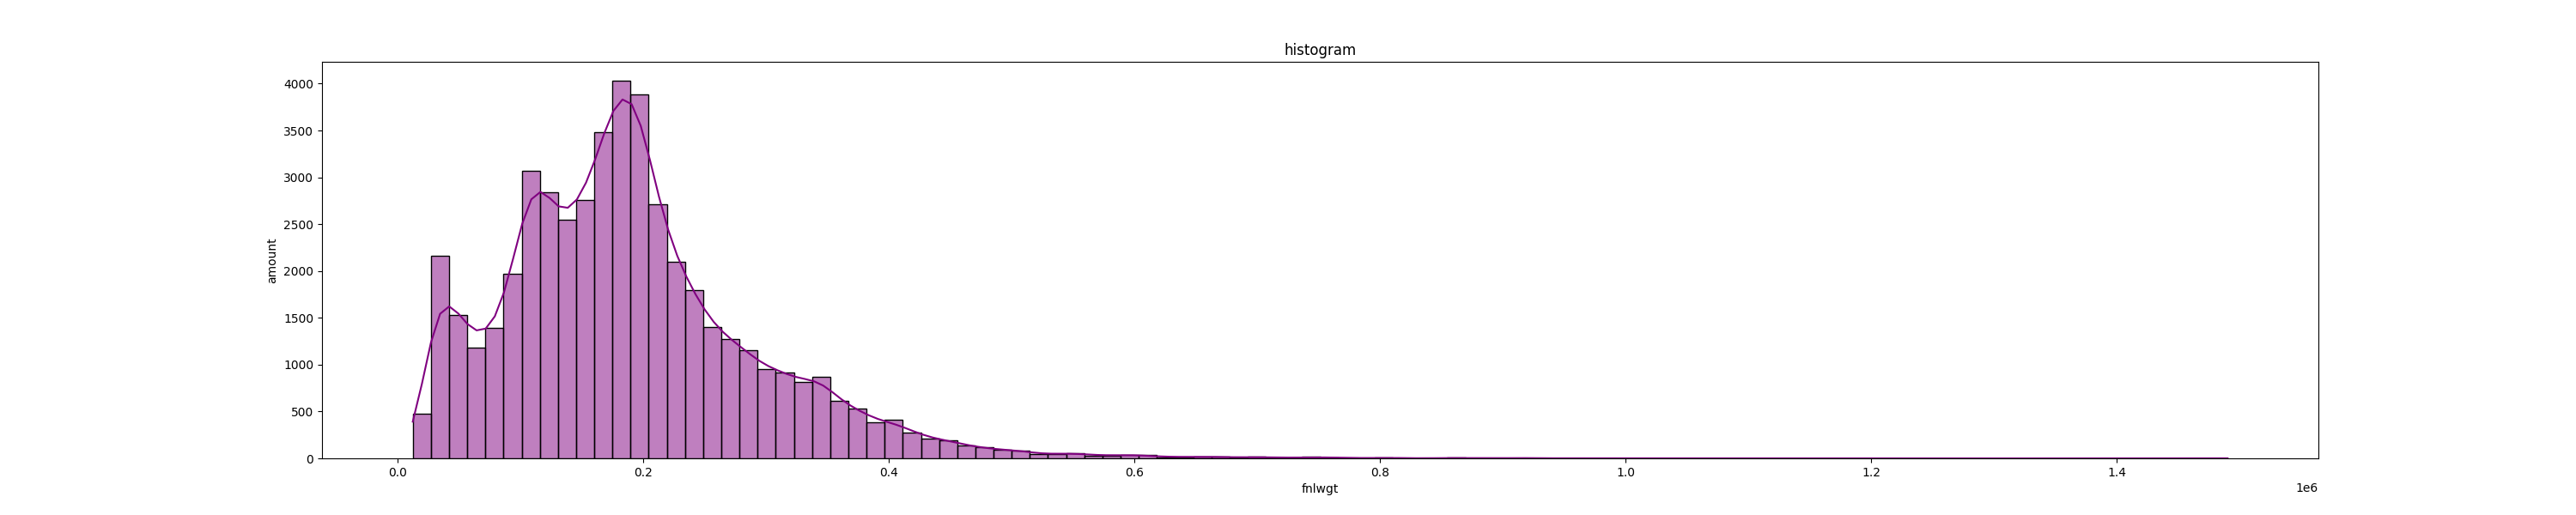

In [6]:
#3
def plot3(df, cat):
    plt.figure(figsize=(30,6))
    plt.title("histogram")
    plt.xlabel(cat)
    plt.ylabel("amount")
    sns.histplot(df[cat], bins=100, kde=True, color='purple') # bins ??? binrange, binwidth
    
cat = 'fnlwgt'

plot3(df, cat)

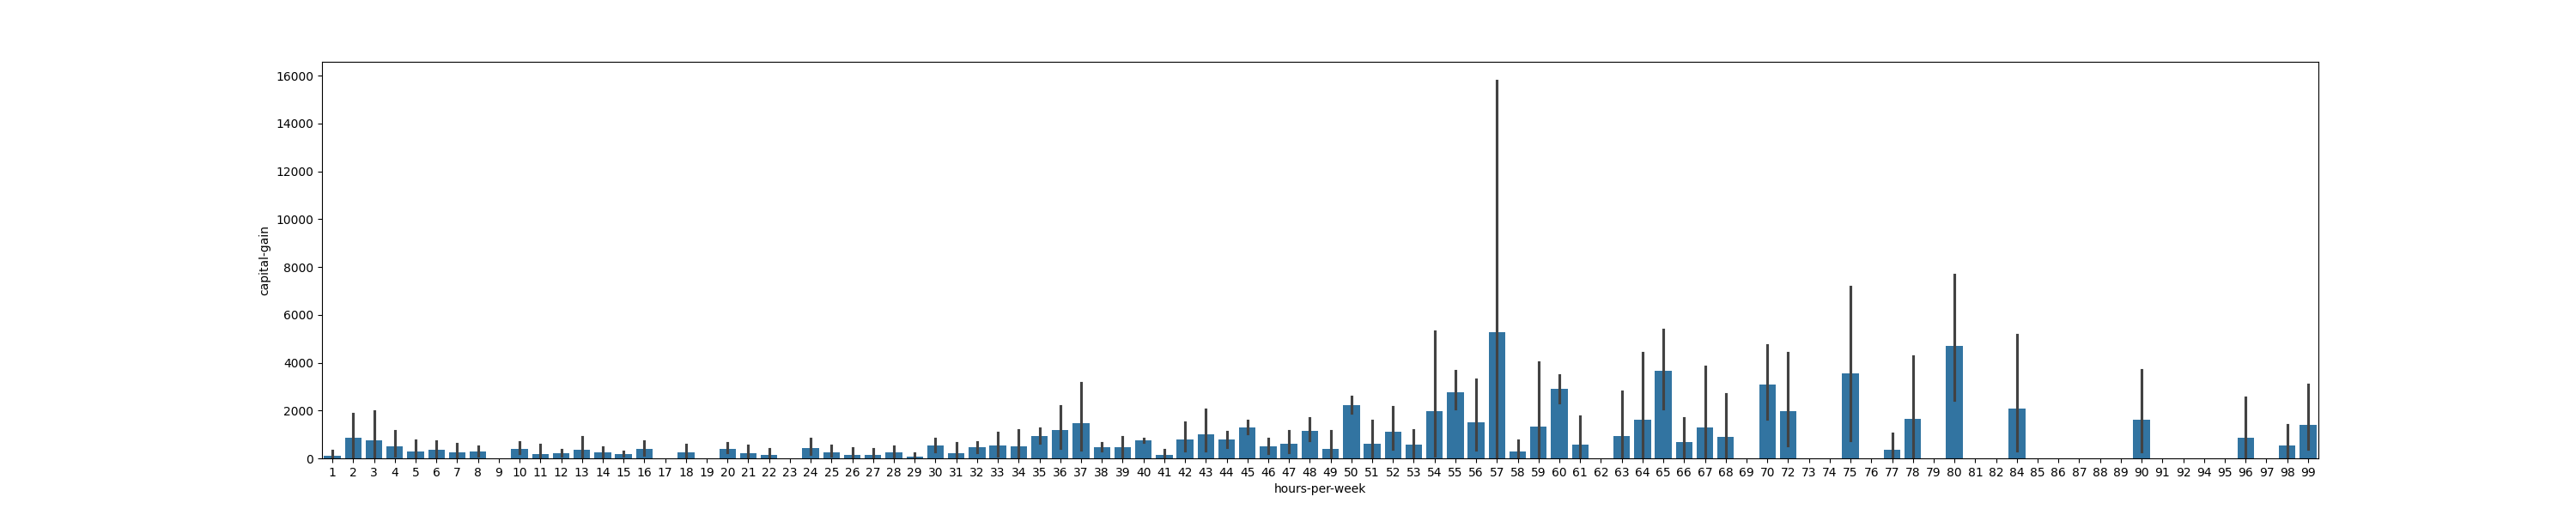

In [7]:
#4
def plot4(df):
    plt.figure(figsize=(30,6))
    sns.barplot(x=df['hours-per-week'], y=df['capital-gain'])


plot4(df)


In [8]:
#5
print("Pearson:", scipy.stats.pearsonr(norm_df["capital-gain"], norm_df["capital-loss"]))
print("Spearman:", scipy.stats.spearmanr(norm_df["capital-gain"], norm_df["capital-loss"]))
print("Pearson:", scipy.stats.pearsonr(norm_array[:,1], norm_array[:,2]))
print("Spearman:", scipy.stats.spearmanr(norm_array[:,1], norm_array[:,2]))
#numbers are equal

Pearson: PearsonRResult(statistic=-0.03144077064746212, pvalue=3.6523009615684135e-12)
Spearman: SignificanceResult(statistic=-0.06632843871568463, pvalue=9.387662961244928e-49)
Pearson: PearsonRResult(statistic=-0.03144077064746212, pvalue=3.6523009615684135e-12)
Spearman: SignificanceResult(statistic=-0.06632843871568463, pvalue=9.387662961244928e-49)


In [9]:
#6
def hot_pd(df, cat):
    result_df = df
    encoder = sklearn.preprocessing.OneHotEncoder(sparse_output=False)
    one_hot = encoder.fit_transform(result_df[[cat]])
    one_hot_df = pd.DataFrame(one_hot, columns=encoder.get_feature_names_out([cat]))
    result_df = pd.concat([result_df, one_hot_df], axis=1)
    result_df = result_df.drop([cat], axis=1)
    return result_df

def hot_np(array, column_index):
    unique_values = np.unique(array[:, column_index])
    num_classes = len(unique_values)
    encoded_array = np.zeros((array.shape[0], num_classes), dtype=str)

    for i, value in enumerate(unique_values):
        encoded_array[array[:, column_index] == value, i] = '1'
        encoded_array[array[:, column_index] != value, i] = '0'

    # Замінити оригінальну колонку новими закодованими колонками
    array = np.delete(array, column_index, axis=1)
    array = np.concatenate((array, encoded_array), axis=1)

    return array

cat = "sex"
hot_pd(df, cat)

hot_np(array, 9)

array([['39', 'State-gov', '77516', ..., '<=50K', '0', '1'],
       ['50', 'Self-emp-not-inc', '83311', ..., '<=50K', '0', '1'],
       ['38', 'Private', '215646', ..., '<=50K', '0', '1'],
       ...,
       ['38', 'Private', '374983', ..., '<=50K.', '0', '1'],
       ['44', 'Private', '83891', ..., '<=50K.', '0', '1'],
       ['35', 'Self-emp-inc', '182148', ..., '>50K.', '0', '1']],
      dtype='<U26')

c:\Users\Denys\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\Denys\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
c:\Users\Denys\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
c:\Users\Denys\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an e

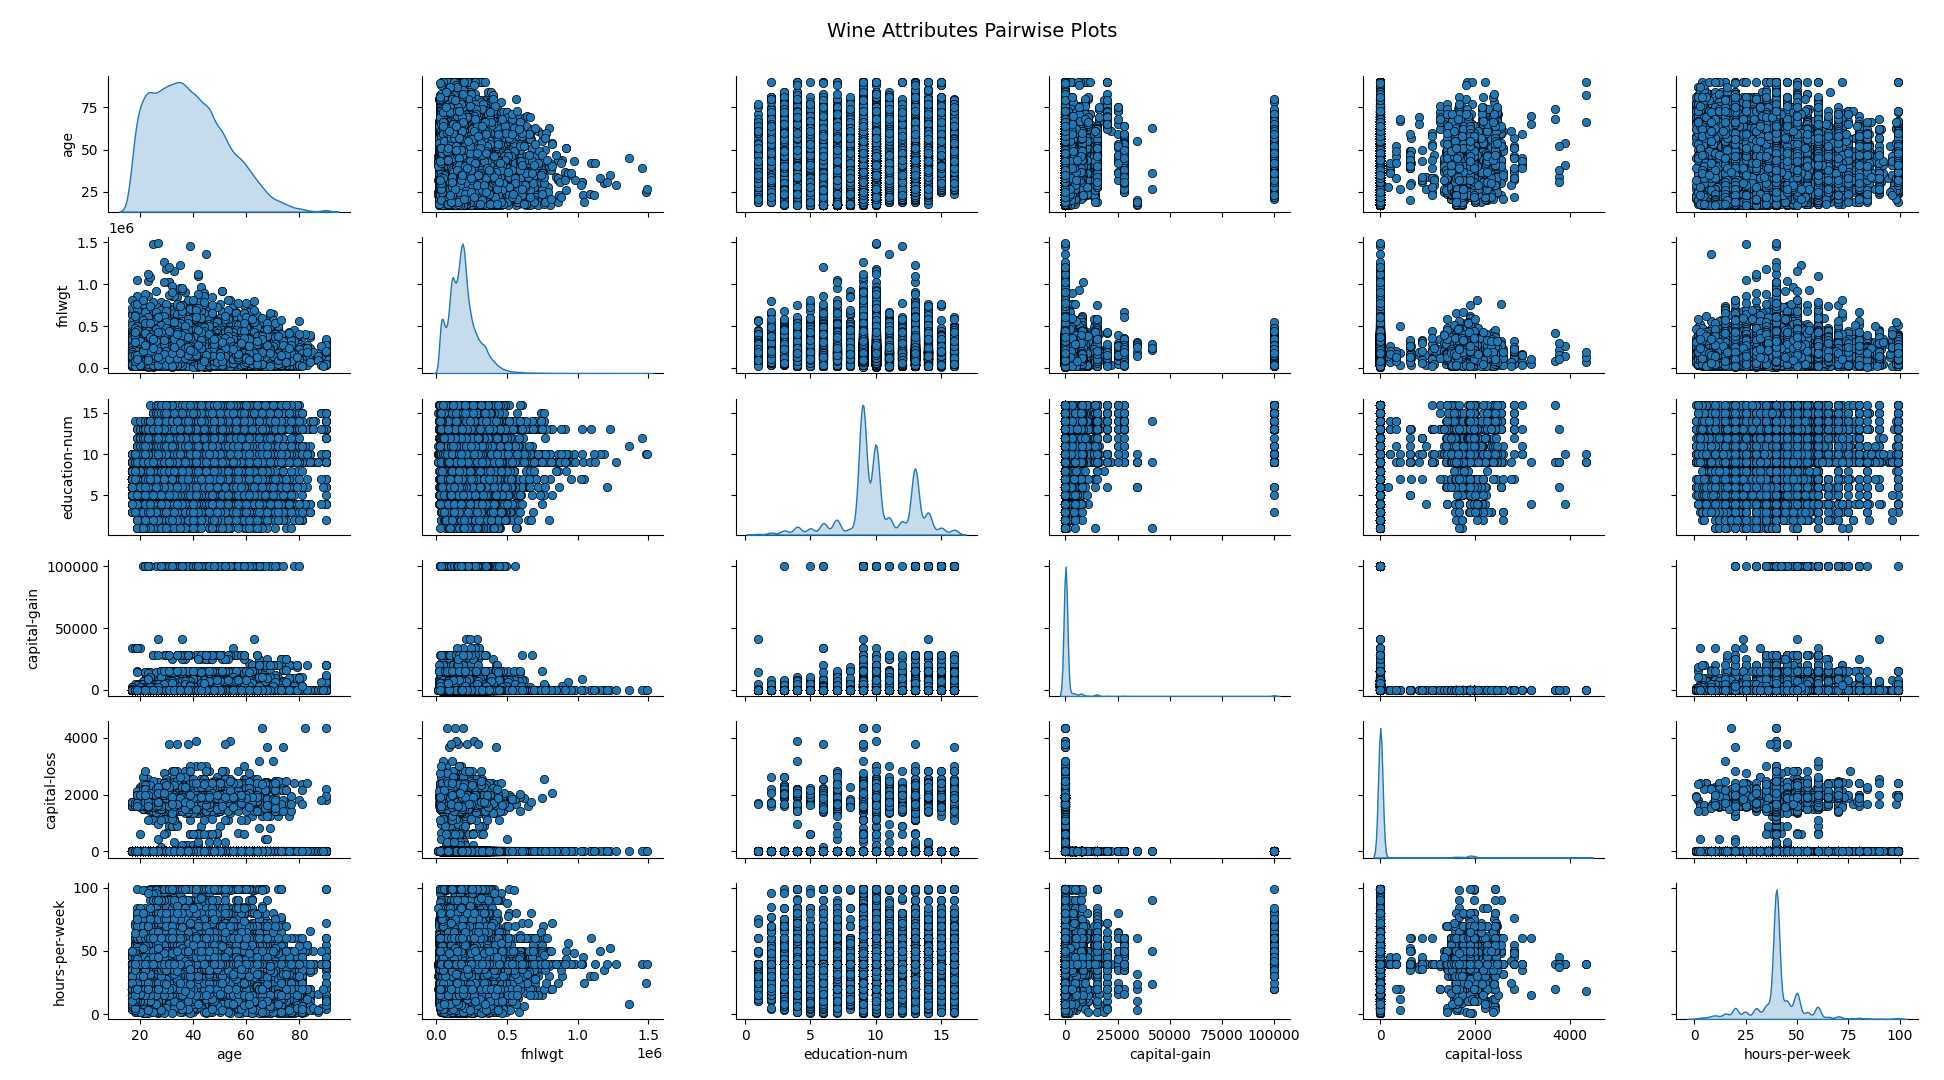

In [10]:
#7
cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
pp = sns.pairplot(df[cols], size=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)


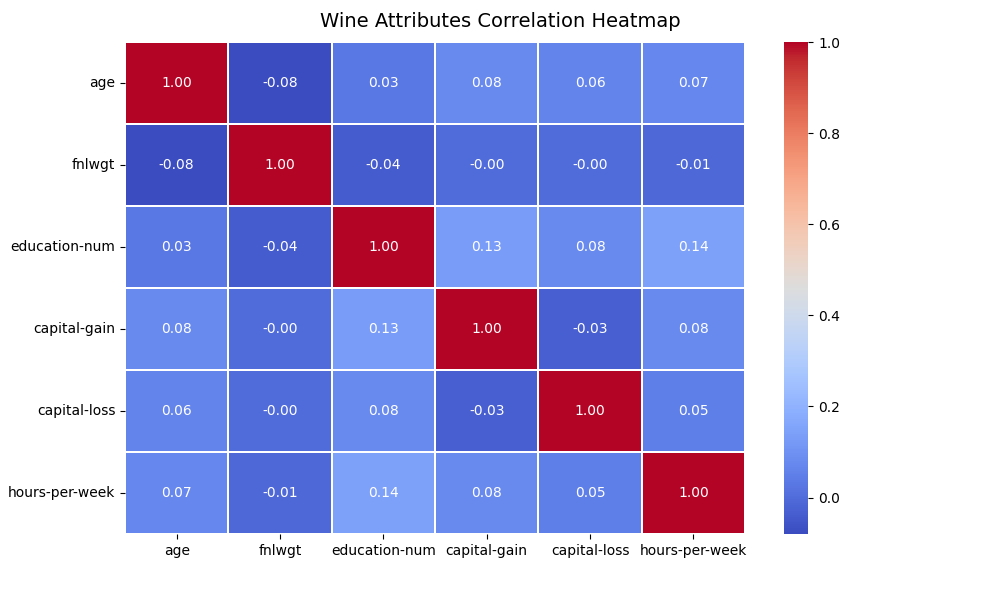

In [11]:
tdf = df[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']]

f, ax = plt.subplots(figsize=(10, 6))
corr = tdf.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Wine Attributes Correlation Heatmap', fontsize=14)

Text(0.5, 0, 'hours-per-week')

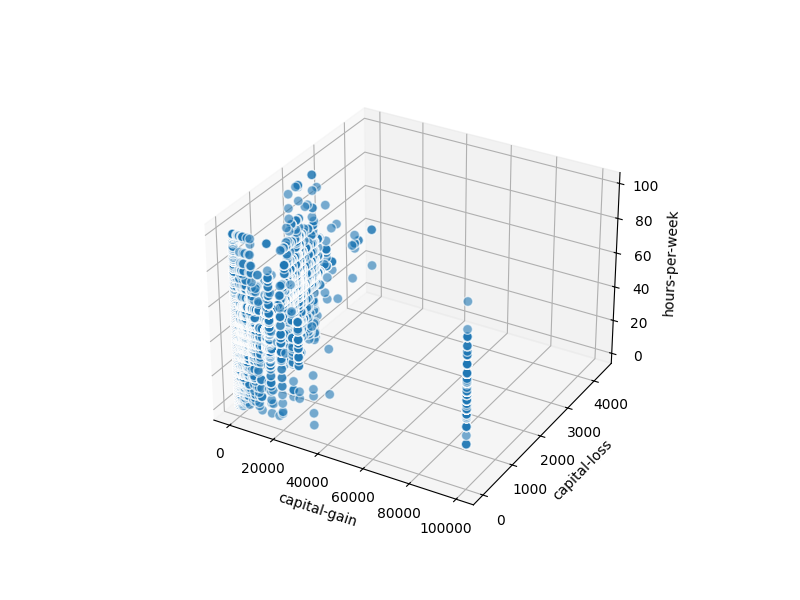

In [12]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = df['capital-gain']
ys = df['capital-loss']
zs = df['hours-per-week']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('capital-gain')
ax.set_ylabel('capital-loss')
ax.set_zlabel('hours-per-week')